# Illustrating Bayes theorem

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

An intuitive understanding of Bayes' theorem is important to understand the Kalman filter. In this example, we will illustrate Bayes' theorem first through empirical sampling, and then by analytically calculating the posterior. 

We start with a probability distribution over some random variable $ X $, which is normally distributed with a know mean $μ$ and standard deviation $σ$. 

$$ X ∼ p(X) = \mathcal{N}(μ, σ) $$

We then "measure" $X$, assuming that our measurement $ Y $ is noise corrupted, i.e.,:

$$ Y = X + ε, \; \; ε \sim \mathcal{N}(0, σ_y ) $$

Notice that $ Y $ is also a random variable. However, when we perform the measurement, we sample from $ Y $, receiving an actual value $ y ∼ Y$. Our question becomes: which values of $ x \sim X $ are most likely to have produced our measurement $ y $? Stated differently: after having sampled our measurement $ y $ from the random variable $ Y $, can we update our probability distribution over $ X $? 

Mathematically, what is the probability distribution over $ X $, conditioned on us having observed $ Y = y $?

$$ p(X|Y=y) $$

The solution is provided by Bayes' theorem:

$$ p(X|Y = y) = \frac{p(Y = y|X)p(X)}{p(Y=y)} $$

We will illustrate this empirically. First, we will generate $ N = 10000 $ samples from the *prior* distribution, $ p(X) = \mathcal{N}(μ = 80, σ = 5)$:

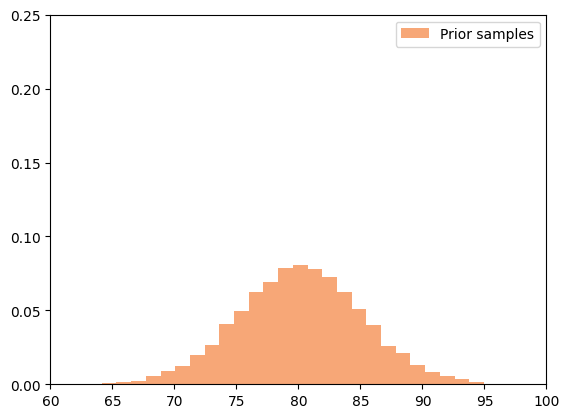

In [2]:
N = 10000
μ_prior = 80
σ_prior  = 5
X_prior = np.random.normal(size = N, loc = μ_prior, scale = σ_prior)

plt.hist(X_prior, bins=30, alpha=0.6, color="#f36c1d", density=True, label='Prior samples')
plt.xlim(60, 100)
plt.ylim(0, 0.25)
plt.legend()
plt.show()

Now, let us suppose we receive measurement $ y = 70 $, and we know the standard deviation of the measurement noise is $ σ_y = 2 $. We can now ask, what is the probability of having observed $y = 70$, given that $ x $ is equal to each of the samples we generated earlier?

$$ p(Y = y | X = x_i) $$

Where $ x_i $ is one of our samples. Since $ Y = X + ε $ with $ ε ∼ \mathcal{N}(0, σ_y) $:

$$ p(Y = y | X = x_i) = \mathcal{N}(x_i, σ_y) $$

We call this the likelihood of $ x_i $, and we can calculate it for each of our samples. We do so below, then visualise the likelihood by generating a scatter plot of $ p(x_i) $ (the prior distribution for each sample $x_i$), but we change the size and transparency of each marker according to the likelihood:

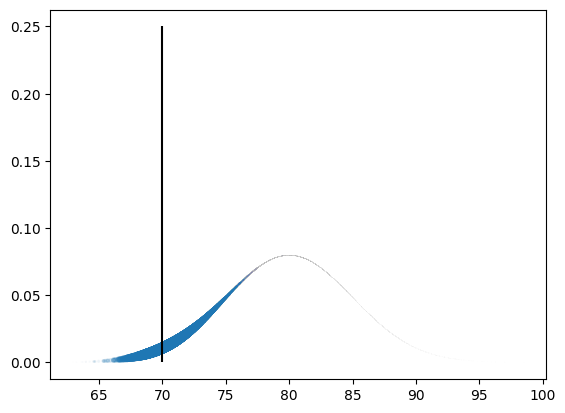

In [3]:
y = 70
σ_y = 2

x_likelihood = np.zeros(N)
for i, x in enumerate(X_prior):
    x_likelihood[i] = norm.pdf(y, X_prior[i], σ_y)

plt.vlines(y, 0, 0.25, colors='k', label='Measurement')
plt.scatter(X_prior, norm.pdf(X_prior, μ_prior, σ_prior), alpha=(0.995*x_likelihood/np.max(x_likelihood) + 0.005), s = 50*x_likelihood/np.max(x_likelihood) + 0.1)

Notice how the samples close to the measurement are far more likely, even though we have more samples further away from the measurement. 

To obtain the *posterior* distribution $ p(X|Y=y)$ (i.e., the distribution over $x$ after we've measured $ Y=y$) , we are going to *resample* from our original set of $x_i$, but the probability of sampling a specific value $x_i$ is proportional to the likelihood, $p(Y=y|X=x_i)$:

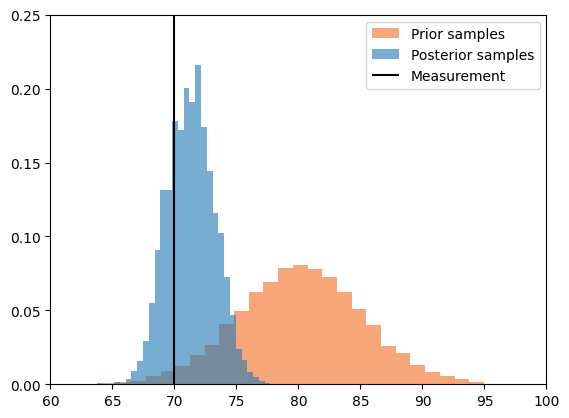

In [4]:
p = x_likelihood / np.sum(x_likelihood)
X_posterior = np.random.choice(X_prior, size=N, p=p)

plt.hist(X_prior, bins=30, alpha=0.6, color="#f36c1d", density=True, label='Prior samples')
plt.hist(X_posterior, bins=30, alpha=0.6, color="#1f77b4", density=True, label='Posterior samples')
plt.vlines(y, 0, 0.25, colors='k', label='Measurement')
plt.xlim(60, 100)
plt.ylim(0, 0.25)
plt.legend()
plt.show()

If the prior and likelihood both follow a normal distribution (and the measurement $y$ is a linear function of the variable $x$), then the posterior will also be normal. We can calculate the mean and the covariance of the posterior using the residual $r$ and the *Kalman gain* $ K $:

$$ r = y - μ $$
$$ K = σ^2 / σ_y^2 $$
$$ μ_{post} = μ + Kr $$
$$ σ_{post} = σ \sqrt{1 - K} $$

Where $ μ $ and $ μ_{post} $ represent the prior and posterior means and $ σ $ and $σ_post$ are the prior and posterior standard deviations. The formula above are valid for the univariate case, but can be extended to the multivariate case as well.

🔎 Using the formula above, calculate the posterior probability distribution analytically, and overlay it with the histograms below.


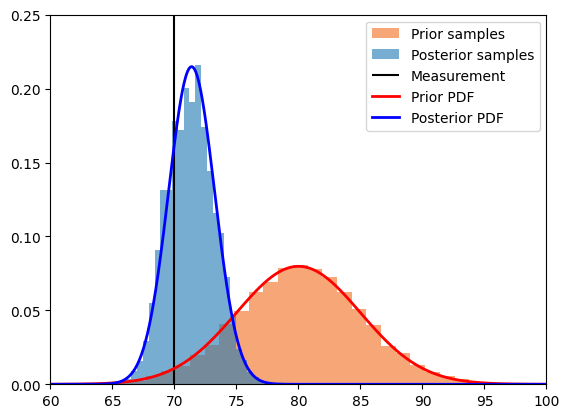

In [ ]:
x_range = np.linspace(60, 100, 1000)
prior_pdf = norm.pdf(x_range, μ_prior, σ_prior)

plt.hist(X_prior, bins=30, alpha=0.6, color="#f36c1d", density=True, label='Prior samples')
plt.hist(X_posterior, bins=30, alpha=0.6, color="#1f77b4", density=True, label='Posterior samples')
plt.vlines(y, 0, 0.25, colors='k', label='Measurement')
plt.plot(x_range, prior_pdf, 'r-', linewidth=2, label='Prior PDF')

# <----- Calculate and plot the posterior analytically


plt.xlim(60, 100)
plt.ylim(0, 0.25)
plt.legend()
plt.show()
